# **The Sparks Foundation Intership**

## **Data Science and Business Analyst**

### **Task 1. Supervised ML**

#### **Task Name:** 
##### Predict the Percentage of a student based on the no. of study hours

#### **Objective:**
##### To predict the percentage of a student if he/she studies for 9.25 hrs/day

### **Author :** KRISHNENDU SARKAR

In [1]:
# importing libraries to mount gdrive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
# importing the required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

### **1. Reading and Understanding Data**

In [3]:
# Reading the data
df_marks = pd.read_csv('/content/gdrive/MyDrive/Sparks Internship/Task1_Supervised_ML/student_scores - student_scores.csv')

In [4]:
# Checking the data
df_marks

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [5]:
# Inspecting the data to check the datatypes of the columns
df_marks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
# Checking the statistical parameters of the data
df_marks.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
# Checking the shape of the data
df_marks.shape

(25, 2)

### **2. Exploratory Data Analysis**

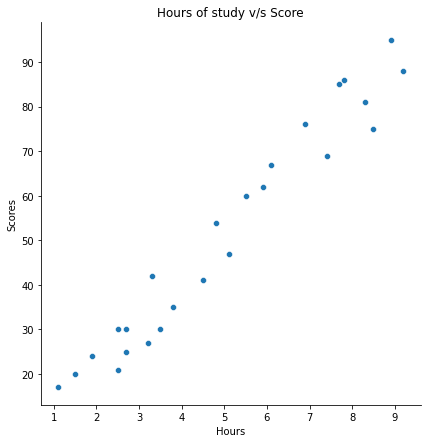

In [8]:
# Plotting a graph
sns.pairplot(df_marks, x_vars='Hours', y_vars='Scores',size=6, aspect=1, kind='scatter')
plt.title("Hours of study v/s Score")
plt.show()

The relation between the the number of hours and scores are linear

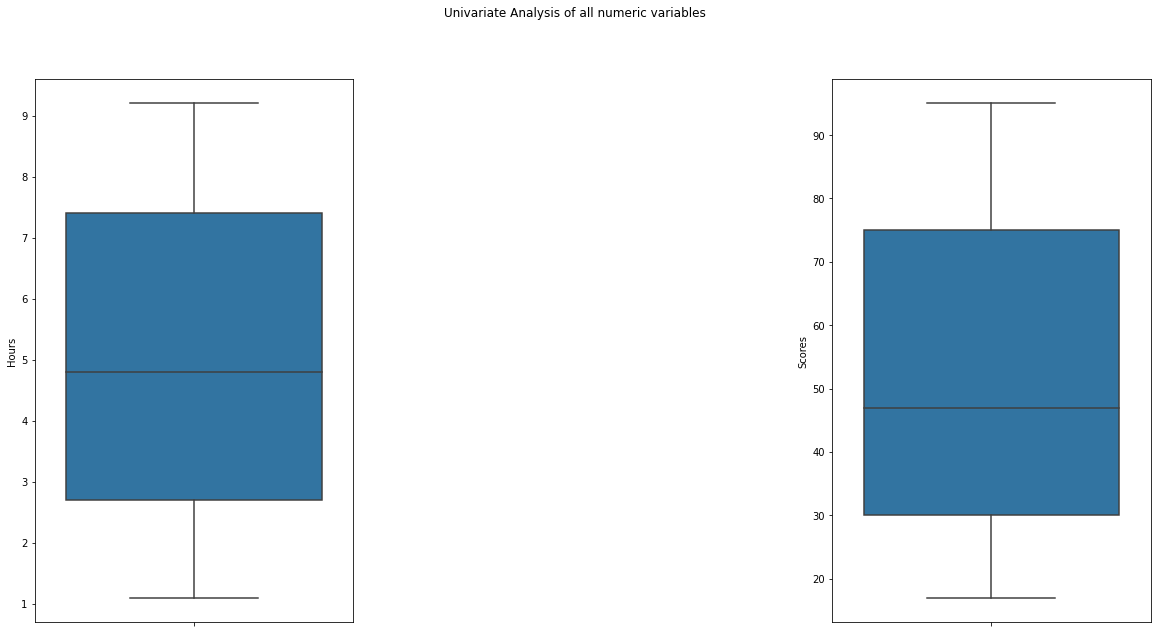

In [9]:
# Checking outliers
# Plotting Box Plots
plt.figure(figsize =(20,10))
plt.suptitle("Univariate Analysis of all numeric variables")
plt.subplot(1,2,1)
plt.subplots_adjust(left=0.125, bottom=None, right=None, top=None, wspace=1.5, hspace=1.5)
sns.boxplot(y=df_marks['Hours'])

plt.subplot(1,2,2)
plt.subplots_adjust(left=0.125, bottom=None, right=None, top=None, wspace=1.5, hspace=1.5)
sns.boxplot(y=df_marks['Scores'])
plt.show()

There seems to be no outliers in both the columns of data.

### **3. Simple Linear Regression**

In [10]:
# Dividing into dependent(y) and independent(X) variables
X = df_marks['Hours']
y = df_marks['Scores']

In [11]:
# Splitting into train and test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y, train_size=0.7, test_size=0.3, random_state=100)

In [12]:
# Checking X_train
X_train.head()

6     9.2
12    4.5
4     3.5
24    7.8
0     2.5
Name: Hours, dtype: float64

In [13]:
# Checking y_train
y_train.head()

6     88
12    41
4     30
24    86
0     21
Name: Scores, dtype: int64

In [14]:
# Building a Linear Model
import statsmodels.api as sm

In [15]:
# add constant to get intercept c
X_train_sm = sm.add_constant(X_train)

In [16]:
# Fit the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

In [17]:
# Print the parameters, i.e. the intercept and the slope of the regression line fitted
lr.params

const    1.495142
Hours    9.871714
dtype: float64

In [18]:
# Performing a summary operation lists out all the different parameters of the regression line fitted
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                 Scores   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     334.4
Date:                Mon, 19 Apr 2021   Prob (F-statistic):           1.15e-11
Time:                        09:33:29   Log-Likelihood:                -53.270
No. Observations:                  17   AIC:                             110.5
Df Residuals:                      15   BIC:                             112.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4951      3.169      0.472      0.6

We can see the R-squared value for this model is 0.957 which is a very good score.

Therefore the equation of the best fit line is :

Scores = 1.5 + 9.87xHours

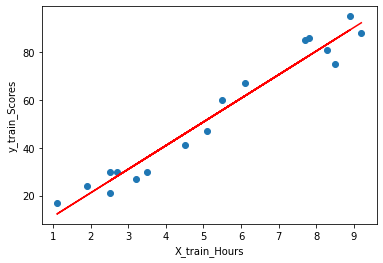

In [19]:
# Checking the nature of the training data set
plt.scatter(X_train, y_train)
plt.plot(X_train, 1.5 + 9.87*X_train, 'r')
plt.xlabel("X_train_Hours")
plt.ylabel("y_train_Scores")
plt.show()

### **4. Predictions on Test set**

In [20]:
# Checking the test set
X_test

9     2.7
22    3.8
13    3.3
11    5.9
5     1.5
19    7.4
23    6.9
21    4.8
Name: Hours, dtype: float64

In [21]:
# Insert asked value in the test data
X_test.loc[8]=9.25

In [22]:
# Checking the test set
X_test

9     2.70
22    3.80
13    3.30
11    5.90
5     1.50
19    7.40
23    6.90
21    4.80
8     9.25
Name: Hours, dtype: float64

In [23]:
# Adding a constant to X_test
X_test_sm = sm.add_constant(X_test)

In [24]:
# Predicting the y values corresponding to X_test_sm
y_pred = lr.predict(X_test_sm)

In [25]:
# Observing the predicted values
y_pred

9     28.148771
22    39.007657
13    34.071800
11    59.738257
5     16.302714
19    74.545829
23    69.609972
21    48.879371
8     92.808501
dtype: float64

We have got our answer in the last row of the above dataset that is if a student studies for 9.25 hrs/day he/she scores 92.81%

### **5. Model Evaluation**

In [26]:
# libraries to find the r-squared score for test set
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [27]:
# Dropping the asked value to make the predicted data set of same shape as that of test data set
y_pred.drop(8, inplace=True)

In [28]:
# Finding out the value of Model evaluation metric i.e Mean Absolute Error
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 4.762517892332275


We will use the metric R-squared value for Model Evaluation.

In [29]:
# Finding out the r-squared score for the test data compared to the predicted data to evaluate the model
r_squared = r2_score(y_test, y_pred)
r_squared

0.9309458862687437

It seems to be a very good model for prediction because both the training and testing data have good R-squared scores.

In [30]:
# Checking X_test data
X_test

9     2.70
22    3.80
13    3.30
11    5.90
5     1.50
19    7.40
23    6.90
21    4.80
8     9.25
Name: Hours, dtype: float64

In [31]:
# Checking y_test data
y_test

9     25
22    35
13    42
11    62
5     20
19    69
23    76
21    54
Name: Scores, dtype: int64

In [32]:
# Dropping the asked data to equalise the shape with the y_test data
X_test.drop(8,inplace=True)

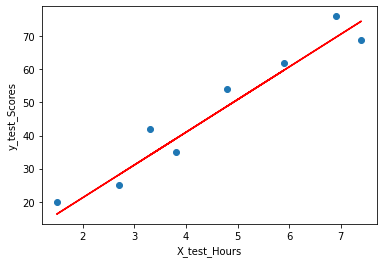

In [33]:
# Observing the nature of the test data
plt.scatter(X_test, y_test)
plt.plot(X_test, 1.5 + 9.87*X_test, 'r')
plt.xlabel("X_test_Hours") #x label
plt.ylabel("y_test_Scores") #y label
plt.show()

The nature of the test data also seems to be linearly increasing.

Student Score Data Analysis Conclusion:
1. The more number of hours a student studies the better he or she scores.¶
2. Any student who will study for 9.25 hrs/day will get 92.81% marks

**THANK YOU**